In [1]:
# Import the python libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
from scipy import stats
from statsmodels.formula.api import ols
import seaborn as sns
import os
sns.set(color_codes=True)

In [2]:
# Get the path of current working directory 
path = os.getcwd()
print(path)

/Users/reenasehitya/GGU/MSBA 320/Final Project/Insurance Premium Cost dataset


In [3]:
# To get the list of all files and directories 
# in current working directory 
dir_list = os.listdir(path) 
print("Files and directories in '", path, "' :")  
# print the list 
print(dir_list) 

Files and directories in ' /Users/reenasehitya/GGU/MSBA 320/Final Project/Insurance Premium Cost dataset ' :
['MSBA 320- Final Project.docx', 'Final Project on Insurance Premium.ipynb', 'datasets_13720_18513_insurance.csv', '.ipynb_checkpoints']


In [4]:
# To clean up memeory
import gc
gc.collect()

60

In [5]:
# Read the dataset "datasets_13720_18513_insurance.csv" into dataframe
df = pd.read_csv("datasets_13720_18513_insurance.csv", header = 0)
df.rename(columns={"charges": "MedicalExpenses", "sex": "gender"}, inplace=True)
df.head() # To get to know the fisrt 5 rows of our dataframe

,age,gender,bmi,children,smoker,region,MedicalExpenses
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
np.log(np.log(df.MedicalExpenses))

0       2.275643
1       2.008657
2       2.128296
3       2.302394
4       2.111448
          ...   
1333    2.226639
1334    2.041081
1335    2.000971
1336    2.028788
1337    2.330192
Name: MedicalExpenses, Length: 1338, dtype: float64

[Text(0.5, 1.0, 'KDE of MedicalExpenses after applying log')]

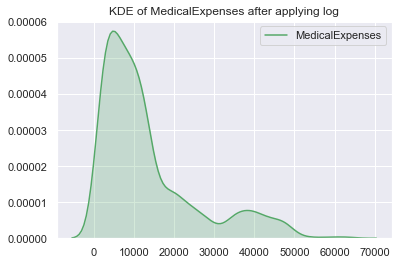

In [7]:
# KDE distribution of medical expenses after tranforming by applying log
sns.kdeplot(df['MedicalExpenses'],shade=True, color="g",).set(title = 'KDE of MedicalExpenses after applying log')


In [8]:
df.tail(10).T # To get to know the last 10 rows of our dataframe

,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337
age,23,52,57,23,52,50,18,18,21,61
gender,female,male,female,female,female,male,female,female,female,female
bmi,24.225,38.6,25.74,33.4,44.7,30.97,31.92,36.85,25.8,29.07
children,2,2,2,0,3,3,0,0,0,0
smoker,no,no,no,no,no,no,no,no,no,yes
region,northeast,southwest,southeast,southwest,southwest,northwest,northeast,southeast,southwest,northwest
MedicalExpenses,22395.7,10325.2,12629.2,10795.9,11411.7,10600.5,2205.98,1629.83,2007.94,29141.4


In [9]:
df.head()

,age,gender,bmi,children,smoker,region,MedicalExpenses
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
# To get to know number # observations and  # column in our dataset
print("Number # observations & # column in our dataset: ",df.shape)

Number # observations & # column in our dataset:  (1338, 7)


In [11]:
# To get information about the datatype of each column, number of rows, columns etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1338 non-null   int64  
 1   gender           1338 non-null   object 
 2   bmi              1338 non-null   float64
 3   children         1338 non-null   int64  
 4   smoker           1338 non-null   object 
 5   region           1338 non-null   object 
 6   MedicalExpenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
# To check if there's any missing or NAN values in the dataframe "MedianHomePrices"
df.isnull()

,age,gender,bmi,children,smoker,region,MedicalExpenses
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [13]:
# To count all NaN in a DataFrame (both columns & Rows)
df.isnull().sum().sum() # our dataframe is clean

0

In [14]:
# To determine the data type of each column in our dataframe
df.dtypes

age                  int64
gender              object
bmi                float64
children             int64
smoker              object
region              object
MedicalExpenses    float64
dtype: object

In [15]:
#list of column names
data_columns = list(df)
data_columns
#type(data_columns)

['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'MedicalExpenses']

In [16]:
# To define what are the categorical columns and numerical columns in our dataframe
numerical_columns = ['age', 'bmi', 'children', 'MedicalExpenses']
categorical_columns = [column for column in data_columns  if column not in numerical_columns]

print('\n Numeric columns \n', numerical_columns )
print('\n categorical_columns \n', categorical_columns)


 Numeric columns 
 ['age', 'bmi', 'children', 'MedicalExpenses']

 categorical_columns 
 ['gender', 'smoker', 'region']


In [60]:
# To get mean and range of home prices 
round(df.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.21,14.05,18.00,27.00,39.00,51.00,64.00
bmi,1338.0,30.66,6.10,15.96,26.30,30.40,34.69,53.13
children,1338.0,1.09,1.21,0.00,0.00,1.00,2.00,5.00
MedicalExpenses,1338.0,2.20,0.10,1.95,2.14,2.21,2.27,2.40


In [18]:
# To get to know about the categorical variables in our dataframe
df.describe(include='object')

,gender,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


This table gives us a brief idea that number of male is higher than female. Number of non-smoker(1064) is less than number of smoker(274). There are 364 people from Southeast region.

In [19]:
from scipy.stats import kurtosis, skew, stats

In [20]:
# Kurtosis and skewness of all Numerical variables of our dataframe
print('The kurtosis of all Numeric columns are: \n')
print( 'Excess kurtosis of "Medical Expenses" (should be 0): {}'.format( kurtosis(df['MedicalExpenses'])))
print( 'Excess kurtosis of "bmi" (should be 0): {}'.format( kurtosis(df['bmi'])))
print( 'Excess kurtosis of "children" (should be 0): {}'.format( kurtosis(df['children'])))
print( 'Excess kurtosis of "age" (should be 0): {}'.format( kurtosis(df['age'])),'\n')

print('Skewness of Numeric columns are: \n')
print( 'skewness of "Medical Expenses" (should be 0): {}'.format( skew(df['MedicalExpenses'])))
print( 'skewness of "bmi" (should be 0): {}'.format( skew(df['bmi'])))
print( 'skewness of "children" (should be 0): {}'.format( skew(df['children'])))
print( 'skewness of "age" (should be 0): {}'.format( skew(df['age'])))

The kurtosis of all Numeric columns are: 

Excess kurtosis of "Medical Expenses" (should be 0): 1.595821363956751
Excess kurtosis of "bmi" (should be 0): -0.05502310583700032
Excess kurtosis of "children" (should be 0): 0.1972174268623732
Excess kurtosis of "age" (should be 0): -1.2449206804584227 

Skewness of Numeric columns are: 

skewness of "Medical Expenses" (should be 0): 1.5141797118745743
skewness of "bmi" (should be 0): 0.28372857291709386
skewness of "children" (should be 0): 0.9373281163874423
skewness of "age" (should be 0): 0.055610083072599126


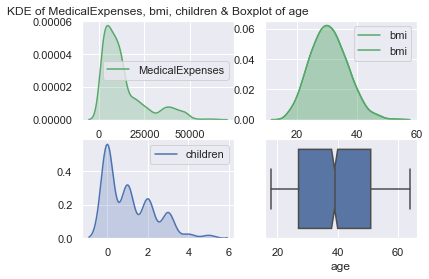

In [21]:
f, axes = plt.subplots(2, 2)
#plt.title("KDE of Medical expenses, BMI, children & Boxplot of age")
#sns.boxplot(df['MedicalExpenses'],notch = True, ax=axes[0,0])
sns.kdeplot(df['MedicalExpenses'],shade=True, color="g", ax=axes[0,0]).set(title = 'KDE of MedicalExpenses, bmi, children & Boxplot of age')
sns.kdeplot(df['bmi'],shade=True, color="g", ax=axes[0,1])
sns.kdeplot(df['bmi'],shade=True, color="g", ax=axes[0,1])
sns.kdeplot(df['children'], shade=True, color="b",ax=axes[1,0])
sns.boxplot(df['age'], ax=axes[1,1], notch = True)
plt.show()

The Kernel density estimation plot of "charges" and "children" show that these variables are right skewed whereas KDE of "bmi" clearly shows that it is normally distributed. The boxplot of "age" shows that it doesn't have skewness, with no outliers and fairly distributed. 

In [22]:
# To change the scale of the font used by Seaborn in its plots
import seaborn as sborn
# Bigger than normal fonts
sborn.set(font_scale=1.25)

## Analysis of categorical_columns 'gender', 'smoker', 'region' with respect to Medical Expenses(response variable)

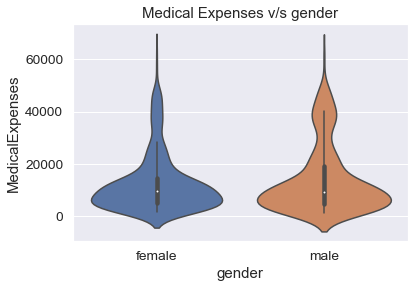

In [23]:
# Medical Expenses v/s gender:
genderVsMedicalExpenses = sns.violinplot(x="gender", y="MedicalExpenses", 
            scale= "count", data=df, fontsize=20);
genderVsMedicalExpenses.set_title("Medical Expenses v/s gender")
plt.show()

The above violin plots are giving us the distribution of medical expenses for both male and female. By looking at the graph, it is clear that the distribution of medical expenses for both male and female are more or less the same with majority of people have medical bills around 10k. Towards the tail, it seems that proportion of male  are higher than female that means more number of male than female have medical expenses in the range from 35k to 50k. 

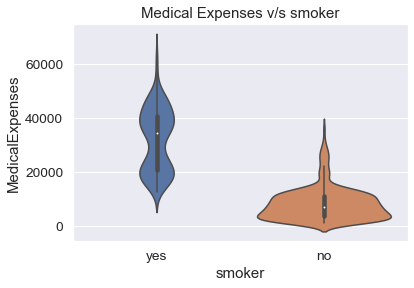

In [24]:
# Medical Expenses v/s smoker:
smokerVsMedicalExpenses = sns.violinplot(x="smoker", y="MedicalExpenses", 
            scale= "count", data=df);
smokerVsMedicalExpenses.set_title("Medical Expenses v/s smoker")
plt.show()

The above violin plots are giving us the distribution of medical expenses for smokers and non-smokers. By looking at the graph, we can see that the distribution of medical expenses for smokers is bimodal that means higher proportion of smokers have medical expenses around 20k and 40k. It is pretty apparent by seeing the distributions that the medical expenses for non-smokers are way lower than that of smokers. If we look at the tail regions for both smokers and non-smokers, we can easily see that the medical expenses of non-smokers are around 40k whereas the medical expenses for smokers are lying above 70k. Boxplot inside the graph clearly shows the huge differnece between the mean/median medical expenses between smokers and non-smokers.

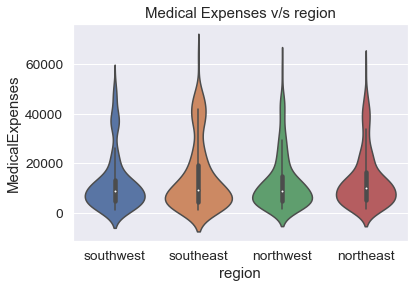

In [25]:
# Medical Expenses v/s region:
regionVsMedicalExpenses = sns.violinplot(x="region", y="MedicalExpenses", 
            scale= "count", data=df);
regionVsMedicalExpenses.set_title("Medical Expenses v/s region")
plt.show()

The above violin plots are giving us the distribution of medical expenses for different region in the US- southwest, southeast, northwest, northeast. By looking at the graph, we can see that the distribution of medical expenses for southeast region is the higest followed by northwest, northeast and southwest. I need to dig further deeper to find out the reason behind higher medical expenses in the southeast region.

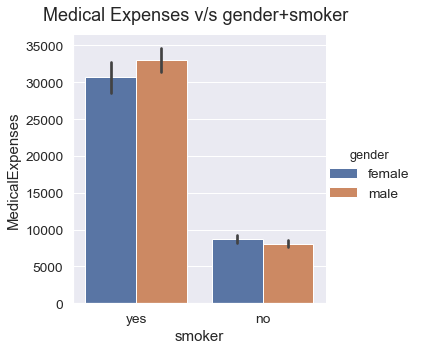

In [26]:
# Medical Expenses v/s gender+smoker:
MedicalExpensesvsGenderSmoker = sns.catplot(x="smoker", y="MedicalExpenses", hue="gender", kind="bar", data=df);
plt.subplots_adjust(top=0.9)
MedicalExpensesvsGenderSmoker.fig.suptitle('Medical Expenses v/s gender+smoker') 
plt.show()

The above bar plots are clearly showing that number of male smokers are more as compared to number of female smokers. As a result, total medical expenses are also higher for male than female. In order to verify this, I will run anova test to see if the mean medical expenses are different between male smokers or female smokers.

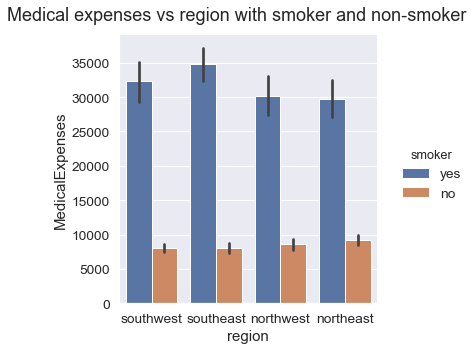

In [27]:
# Medical expenses vs region with smoker and non-smoker
X = sns.catplot(x="region", y="MedicalExpenses", hue="smoker", kind="bar", data=df);
plt.subplots_adjust(top=0.9)
X.fig.suptitle("Medical expenses vs region with smoker and non-smoker")
plt.show()

Earlier violin plots give us a picture that the distribution of medical expenses for southeast region are the highest followed by northwest, northeast and southwest. The above bar plots are showing that number of smokers are also the highest in southeast region that kind of gives us a hint that smoking might be a reason for the highest medical expenses in southeast region. Southwest is the region where there are second highest number of smokers as well as medical expenses associated with that region. However, as per violine plot, southwest was the last region in terms of medical expenses. Rest other orders with northwest and northeast are matching in both box plots and violin plots. To get to the conclusion if smoking lead to increase in the medical expenses in any of the four regions, I will run anova to see if the mean medical expenses are different among the four regions are not. 

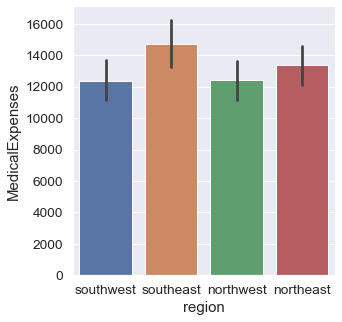

In [28]:
X1 = sns.catplot(x="region", y="MedicalExpenses", kind="bar", data=df);
plt.subplots_adjust(top=0.9)
X.fig.suptitle("Medical expenses vs region with smoker and non-smoker")
plt.show()

### Now comparing  the numerical_columns such as age, bmi with our response variable i.e. "Medical Expenses"

### since, in this case both explainatory and response variables are continuous, a scatter plot is usually used.

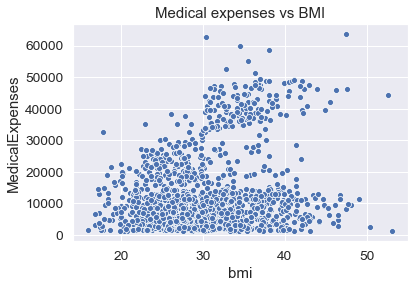

In [29]:
# Medical expenses vs BMI:
MedicalExpensesvsBMI =sns.scatterplot(x=df['bmi'], y=df['MedicalExpenses'])
MedicalExpensesvsBMI.set_title("Medical expenses vs BMI")
plt.show()

The above scatterplot gives us another big factor associated with higher medical expenses i.e. people with higher BMI typically also tend to pay more medical bills or expenses. In other words, BMI and medical expenses are positively correlated. To confirm if this relationship hold true we add a regression line, or the line that best fits the data.

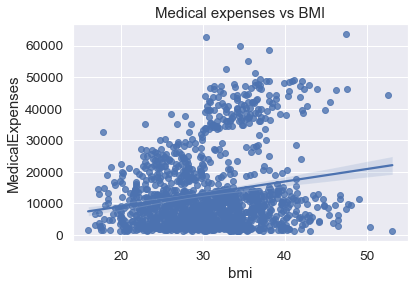

In [30]:
# Medical expenses vs BMI along with regression line:
MedicalExpesesvsBmi = sns.regplot(x="bmi", y="MedicalExpenses", data=df)
MedicalExpesesvsBmi.set_title("Medical expenses vs BMI")
plt.show()

The above scatterplot with regression line suggests that medical expenses increases with higher BMI as people with higher BMI are more prone to chronic disease. Lets dig further to check how smoker and non-smoker along with BMI are related to medical expenses. 

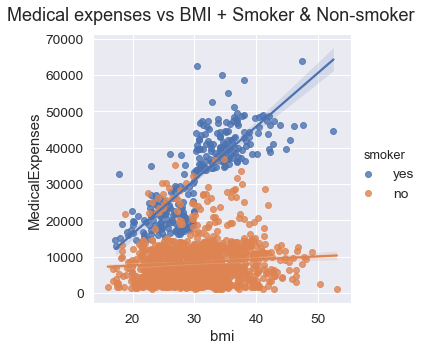

In [31]:
# Medical expenses vs BMI + Smoker along with regression lines:
X2 = sns.lmplot(x="bmi", y="MedicalExpenses", hue="smoker", data=df)
plt.subplots_adjust(top=0.9)
X2.fig.suptitle("Medical expenses vs BMI + Smoker & Non-smoker")
plt.show()

The slope of regression line of smoker is much steeper than the slope of the regression line of non-smoker with a given BMI. This clearly suggests that at a given level of BMI, smokers end up paying more medical expenses that non-smokers.

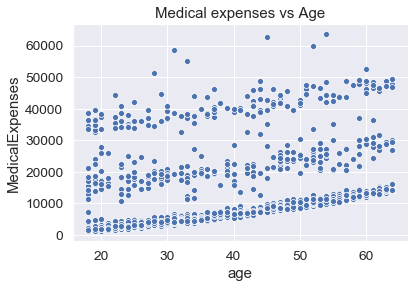

In [32]:
# Medical expenses vs Age:
MedicalExpensesvsAge =sns.scatterplot(x=df['age'], y=df['MedicalExpenses'])
MedicalExpensesvsAge.set_title("Medical expenses vs Age")
plt.show()

The above scatter plot suggests that medical expenses increases with the people become older. In other word, medical expenses are positively correlated with age factor. To confirm if this relationship is really true we add regression line that passes through the data. 

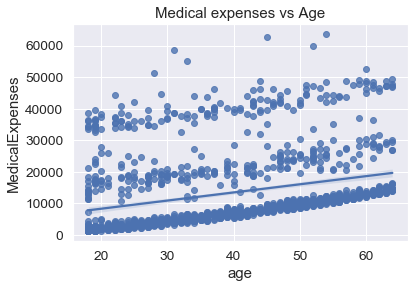

In [33]:
# Medical expenses vs Age along with regression line:
MedicalExpesesvsAge = sns.regplot(x="age", y="MedicalExpenses", data=df)
MedicalExpesesvsAge.set_title("Medical expenses vs Age")
plt.show()

The above scatterplot along the regression line passing through the data suggest that medical expenses are positively related to age. On an average, as people grow older, medical bills also goes up. In the plot, we can see three layers of scatterplots that is indicating might be there are three factors leading to these three layers. If I had some data I would have dig further to see what factors are involved in it

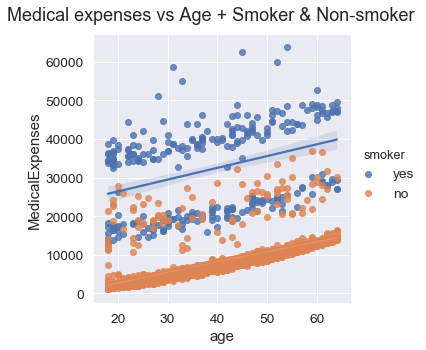

In [34]:
# Medical expenses vs Age & Smoker:
MedicalExpesesvsAgeandSmoker = sns.lmplot(x="age", y="MedicalExpenses", hue = 'smoker', data=df)
plt.subplots_adjust(top=0.9)
MedicalExpesesvsAgeandSmoker.fig.suptitle("Medical expenses vs Age + Smoker & Non-smoker")
plt.show()

The above scatterplot with regression lines are indicating that smokers pay more medical bills as they grow older as compare to non-smoker as they grow older. Let's see if there's any differences in medical expenses between male a nd female with respect to age.

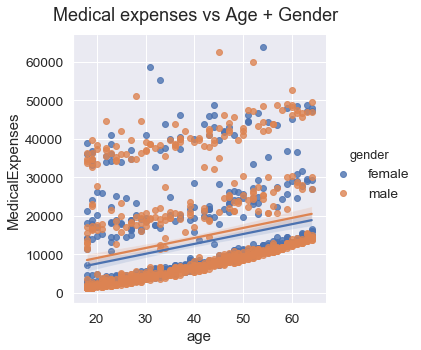

In [35]:
# Medical expenses vs Age & Gender:
MedicalExpesesvsAgeandGender = sns.lmplot(x="age", y="MedicalExpenses", hue = 'gender', data=df)
plt.subplots_adjust(top=0.9)
MedicalExpesesvsAgeandGender.fig.suptitle("Medical expenses vs Age + Gender")
plt.show()

The above scatterplot with regression lines doesn't show any differnce in medical expenses between male a nd female with respect to their age.

In [36]:
insurance_data = pd.read_csv("datasets_13720_18513_insurance.csv", header = 0)

In [37]:
insurance_data['sex'] = insurance_data.sex.replace({'male':1,'female':2})

In [38]:
insurance_data['smoker'] = insurance_data.smoker.replace({'yes':1,'no':2})

In [39]:
insurance_data['region'] = insurance_data.region.replace({'southeast':1,'southwest':2,'northwest':3,'northeast':4})

In [40]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,2,16884.92400
1,18,1,33.770,1,2,1,1725.55230
2,28,1,33.000,3,2,1,4449.46200
3,33,1,22.705,0,2,3,21984.47061
4,32,1,28.880,0,2,3,3866.85520


In [41]:
# correlation between each variables in our dataset:
insurance_data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,0.025019,0.006308,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,0.076185,0.012816,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,-0.003750,-0.262754,0.198341
children,0.042469,-0.017163,0.012759,1.000000,-0.007673,0.001205,0.067998
smoker,0.025019,0.076185,-0.003750,-0.007673,1.000000,0.038873,-0.787251
region,0.006308,0.012816,-0.262754,0.001205,0.038873,1.000000,-0.039473
charges,0.299008,-0.057292,0.198341,0.067998,-0.787251,-0.039473,1.000000


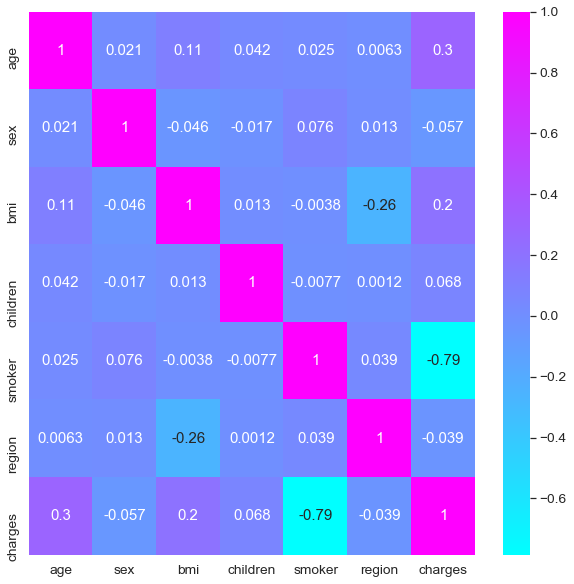

In [42]:
# Correlation heat map
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(insurance_data.corr(), annot=True, cmap='cool')

In [43]:
df.dtypes

age                  int64
gender              object
bmi                float64
children             int64
smoker              object
region              object
MedicalExpenses    float64
dtype: object

correlation matrix and correlation heatmap with correlation coefficients on it shows how all non-binaery variables are related to the response varoable i.e. Medical Expenses. Both matrix and heatmap suggest that age(0.3) and BMI(0.2) is positively correlated to Medical Expenses. To check how significantly these factors are in terms of predicting response variable, I will run regression analysis and anova test  in the next section.

In [46]:
# Statistical modeling of regression using OLS function
from statsmodels.formula.api import ols

In [47]:
# Creating an array with one explanatory variable and one response variable
aX1= np.asarray(df.bmi)
aX = np.asarray(df.age)
aY = np.asarray(df.MedicalExpenses)

In [49]:
# Plotting regression line for model1
from sklearn.linear_model import LinearRegression
#model = LinearRegression()
#model.fit(aX.reshape(-1,1),aY.reshape(-1,1))
#predictions = model.predict(aX.reshape(-1,1))
#plt.scatter(aX, aY, marker='+')
#plt.plot(aX, predictions)
#plt.gca().update(dict(xlabel='Age', ylabel='Medical Expenses', title = 'Medical Expenses vs Age'))
#plt.show()

In [50]:
# Treating outliers
df['MedicalExpenses']=np.log(np.log(df['MedicalExpenses']))
df['MedicalExpenses'].head()

0    2.275643
1    2.008657
2    2.128296
3    2.302394
4    2.111448
Name: MedicalExpenses, dtype: float64

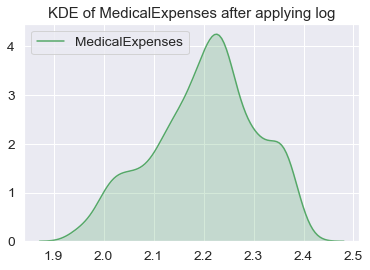

In [51]:
# KDE distribution of medical expenses after tranforming by applying log
sns.kdeplot(df['MedicalExpenses'],shade=True, color="g",).set(title = 'KDE of MedicalExpenses after applying log')
plt.show()

In [57]:
# Creating new variables where h3 is assigned with explainatory variables and Y2 is response variable, so that scatter plot can be done
h3 = np.array(df.age)+np.array(df.bmi)

In [ ]:
from statsmodels.stats.anova import anova_lm

In [61]:
# import pingouin to run N-ways ANOVAs, repeated measures, mixed, ancova
import pingouin as pg

/Users/reenasehitya/opt/anaconda3/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.6, the latest is 0.3.7.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [62]:
# One-way anova between Medical expenses vs smoker
mod1 = ols('MedicalExpenses ~ smoker', data = df).fit()
one_wayMedicalExpensesvsSmoker = anova_lm(mod1, typ=2)
print(one_wayMedicalExpensesvsSmoker.round(4))

          sum_sq      df         F  PR(>F)
smoker    5.7252     1.0  917.7264     0.0
Residual  8.3346  1336.0       NaN     NaN


In [63]:
pt = pg.pairwise_tukey(dv='MedicalExpenses', between='smoker', data=df)
print(pt)

    A    B   mean(A)   mean(B)      diff        se       tail       T  \
0  no  yes  2.169734  2.331832 -0.162098  0.005351  two-sided -30.294   

   p-tukey    hedges  
0    0.001 -2.051137  


In [64]:
# One-way anova between Medical expenses vs region
mod3 = ols('MedicalExpenses ~ region', data = df).fit()
MedicalExpensesvsRegion = anova_lm(mod3, typ=2)
print(MedicalExpensesvsRegion.round(4))

           sum_sq      df       F  PR(>F)
region     0.0440     3.0  1.3975  0.2419
Residual  14.0157  1334.0     NaN     NaN


In [65]:
# One-way anova between Medical expenses vs gender
mod5 = ols('MedicalExpenses ~ gender', data = df).fit()
MedicalExpensesvsGender = anova_lm(mod5, typ=2)
print(MedicalExpensesvsGender)

             sum_sq      df         F    PR(>F)
gender     0.000089     1.0  0.008471  0.926679
Residual  14.059679  1336.0       NaN       NaN


In [66]:
# Two-way ANOVA using Statsmodels- MedicalExpenses ~ C(smoker) + C(region)+ C(region):C(smoker)
formula2 = 'MedicalExpenses ~ C(smoker) + C(region)+ C(region):C(smoker)' 
mod2 = ols(formula2, df).fit()
aov_table2 = anova_lm(mod2, typ=2)
print(aov_table2.round(4))

                     sum_sq      df         F  PR(>F)
C(smoker)            5.7206     1.0  923.5863  0.0000
C(region)            0.0395     3.0    2.1257  0.0952
C(region):C(smoker)  0.0571     3.0    3.0744  0.0268
Residual             8.2379  1330.0       NaN     NaN


In [67]:
# Two-way ANOVA using Statsmodels- MedicalExpenses ~ C(smoker) + C(gender)+ C(smoker):C(gender)' 
formula4 = 'MedicalExpenses ~ C(smoker) + C(gender)+ C(smoker):C(gender)' 
mod4 = ols(formula4, df).fit()
aov_table4 = anova_lm(mod4, typ=2)
print(aov_table4.round(4))

                     sum_sq      df         F  PR(>F)
C(smoker)            5.7621     1.0  929.7577  0.0000
C(gender)            0.0370     1.0    5.9664  0.0147
C(smoker):C(gender)  0.0303     1.0    4.8837  0.0273
Residual             8.2673  1334.0       NaN     NaN


In [68]:
# Two-way ANOVA using Statsmodels- MedicalExpenses ~ C(region) + C(bmi)'
formula5 = 'MedicalExpenses ~ C(region) + C(bmi)' 
mod5 = ols(formula5, df).fit()
aov_table5 = anova_lm(mod5, typ=2)
print(aov_table5.round(4))

           sum_sq     df       F  PR(>F)
C(region)  0.1353    3.0  4.2695  0.0053
C(bmi)     5.7027  547.0  0.9870  0.5642
Residual   8.3130  787.0     NaN     NaN


In [69]:
from pingouin import ancova

In [70]:
ancova(data=df, dv='MedicalExpenses', covar=['bmi'], between='region', effsize="n2")

,Source,SS,DF,F,p-unc,n2
0,region,0.070589,3,2.277823,0.077911,0.005011
1,bmi,0.246014,1,23.815799,0.000001,0.017465
2,Residual,13.769705,1333,NaN,NaN,NaN


In [71]:
# To define what are the categorical columns and numerical columns in our dataframe
numerical_columns = ['age', 'bmi', 'children', 'MedicalExpenses']
categorical_columns = [column for column in df  if column not in numerical_columns]

print('\n Numeric columns \n', numerical_columns )
print('\n categorical_columns \n', categorical_columns)


 Numeric columns 
 ['age', 'bmi', 'children', 'MedicalExpenses']

 categorical_columns 
 ['gender', 'smoker', 'region']


In [72]:
# one-hot encoding
one_hot=pd.get_dummies(df[categorical_columns])
insur_procsd_df=pd.concat([df[numerical_columns],one_hot],axis=1)
insur_procsd_df.head()

,age,bmi,children,MedicalExpenses,gender_female,gender_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,2.275643,1,0,0,1,0,0,0,1
1,18,33.770,1,2.008657,0,1,1,0,0,0,1,0
2,28,33.000,3,2.128296,0,1,1,0,0,0,1,0
3,33,22.705,0,2.302394,0,1,1,0,0,1,0,0
4,32,28.880,0,2.111448,0,1,1,0,0,1,0,0


In [73]:
# Model4 Medical Expenses vs Age + BMI with transformation
model6 = ols('MedicalExpenses ~ age + I(bmi)+ I(children)+I(gender_female)+I(gender_male)+I(smoker_no)+I(smoker_yes)+ I(region_northeast) +I(region_northwest)+I(region_southeast) + I(region_southwest)', data = insur_procsd_df).fit()
print(model6.summary())


                            OLS Regression Results                            
Dep. Variable:        MedicalExpenses   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     521.9
Date:                Sat, 15 Aug 2020   Prob (F-statistic):               0.00
Time:                        21:03:52   Log-Likelihood:                 2099.9
No. Observations:                1338   AIC:                            -4182.
Df Residuals:                    1329   BIC:                            -4135.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.9068    

In [89]:
# Creating new variables where h3 is assigned with explainatory variables and Y2 is response variable, so that scatter plot can be done
h3 = np.array(insur_procsd_df.age)+np.array(insur_procsd_df.bmi)+ np.array(insur_procsd_df.children)+ np.array(insur_procsd_df.gender_female)+ np.array(insur_procsd_df.gender_male)+ np.array(insur_procsd_df.gender_male)+ np.array(insur_procsd_df.smoker_no)+ np.array(insur_procsd_df.smoker_yes)+np.array(insur_procsd_df.region_northeast)+ np.array(insur_procsd_df.region_northwest)+np.array(insur_procsd_df.region_southeast) + np.array(insur_procsd_df.region_southeast)
Y3 = np.array(insur_procsd_df2.MedicalExpenses)

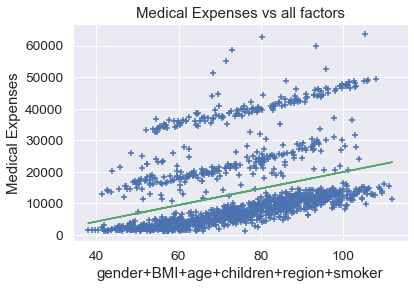

In [91]:
# Plotting regression line for model3
model= LinearRegression()
model.fit(h3.reshape(-1,1),Y3.reshape(-1,1))
predictions4 = model.predict(h3.reshape(-1,1))
plt.scatter(h3, Y3, marker='+')
plt.plot(h3, predictions4, color = 'g')
plt.gca().update(dict(xlabel='gender+BMI+age+children+region+smoker', ylabel='Medical Expenses', title = 'Medical Expenses vs all factors'))
plt.show()

In [80]:
# Read the dataset "datasets_13720_18513_insurance.csv" into dataframe
df2 = pd.read_csv("datasets_13720_18513_insurance.csv", header = 0)
df2.rename(columns={"charges": "MedicalExpenses", "sex": "gender"}, inplace=True)
df2.head() # To get to know the fisrt 5 rows of our dataframe

,age,gender,bmi,children,smoker,region,MedicalExpenses
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [81]:
# To define what are the categorical columns and numerical columns in our dataframe
numerical_columns = ['age', 'bmi', 'children', 'MedicalExpenses']
categorical_columns = [column for column in df2  if column not in numerical_columns]

print('\n Numeric columns \n', numerical_columns )
print('\n categorical_columns \n', categorical_columns)


 Numeric columns 
 ['age', 'bmi', 'children', 'MedicalExpenses']

 categorical_columns 
 ['gender', 'smoker', 'region']


In [82]:
# one-hot encoding
one_hot=pd.get_dummies(df[categorical_columns])
insur_procsd_df2=pd.concat([df2[numerical_columns],one_hot],axis=1)
insur_procsd_df2.head()

,age,bmi,children,MedicalExpenses,gender_female,gender_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [83]:
# Model4 Medical Expenses vs Age + BMI with transformation
model7 = ols('MedicalExpenses ~ age + I(bmi)+ I(children)+I(gender_female)+I(gender_male)+I(smoker_no)+I(smoker_yes)+ I(region_northeast) +I(region_northwest)+I(region_southeast) + I(region_southwest)', data = insur_procsd_df2).fit()
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:        MedicalExpenses   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Sat, 15 Aug 2020   Prob (F-statistic):               0.00
Time:                        21:04:02   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -296.4168    

In [84]:
# comparing model6 and model7
model6vsmodel7 = anova_lm(model6,model7) # when we compare the two models
model6vsmodel7

/Users/reenasehitya/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/reenasehitya/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/reenasehitya/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1329.0,3.394542e+00,0.0,NaN,NaN,NaN
1,1329.0,4.883953e+10,-0.0,-4.883953e+10,inf,NaN


In [85]:
from statsmodels.graphics.gofplots import ProbPlot

In [86]:
def graph(formula, x_range, label=None):
    """
    Helper function for plotting cook's distance lines
    """
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')


def diagnostic_plots(X, y, model_fit=None):
  """
  Function to reproduce the 4 base plots of an OLS model in R.

  ---
  Inputs:

  X: A numpy array or pandas dataframe of the features to use in building the linear regression model

  y: A numpy array or pandas series/dataframe of the target variable of the linear regression model

  model_fit [optional]: a statsmodel.api.OLS model after regressing y on X. If not provided, will be
                        generated from X, y
  """

  if not model_fit:
      model_fit = sm.OLS(y, sm.add_constant(X)).fit()

  # create dataframe from X, y for easier plot handling
  dataframe = pd.concat([X, y], axis=1)

  # model values
  model_fitted_y = model_fit.fittedvalues
  # model residuals
  model_residuals = model_fit.resid
  # normalized residuals
  model_norm_residuals = model_fit.get_influence().resid_studentized_internal
  # absolute squared normalized residuals
  model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
  # absolute residuals
  model_abs_resid = np.abs(model_residuals)
  # leverage, from statsmodels internals
  model_leverage = model_fit.get_influence().hat_matrix_diag
  # cook's distance, from statsmodels internals
  model_cooks = model_fit.get_influence().cooks_distance[0]

  plot_lm_1 = plt.figure()
  plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                            lowess=True,
                            scatter_kws={'alpha': 0.5},
                            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

  plot_lm_1.axes[0].set_title('Residuals vs Fitted')
  plot_lm_1.axes[0].set_xlabel('Fitted values')
  plot_lm_1.axes[0].set_ylabel('Residuals');

  # annotations
  abs_resid = model_abs_resid.sort_values(ascending=False)
  abs_resid_top_3 = abs_resid[:3]
  for i in abs_resid_top_3.index:
      plot_lm_1.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_residuals[i]));

  QQ = ProbPlot(model_norm_residuals)
  plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
  plot_lm_2.axes[0].set_title('Normal Q-Q')
  plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
  plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
  # annotations
  abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
  abs_norm_resid_top_3 = abs_norm_resid[:3]
  for r, i in enumerate(abs_norm_resid_top_3):
      plot_lm_2.axes[0].annotate(i,
                                 xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                     model_norm_residuals[i]));

  plot_lm_3 = plt.figure()
  plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
  sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
  plot_lm_3.axes[0].set_title('Scale-Location')
  plot_lm_3.axes[0].set_xlabel('Fitted values')
  plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

  # annotations
  abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
  abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
  for i in abs_norm_resid_top_3:
      plot_lm_3.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_norm_residuals_abs_sqrt[i]));


  plot_lm_4 = plt.figure();
  plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
  sns.regplot(model_leverage, model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
  plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
  plot_lm_4.axes[0].set_ylim(-3, 5)
  plot_lm_4.axes[0].set_title('Residuals vs Leverage')
  plot_lm_4.axes[0].set_xlabel('Leverage')
  plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

  # annotations
  leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
  for i in leverage_top_3:
      plot_lm_4.axes[0].annotate(i,
                                 xy=(model_leverage[i],
                                     model_norm_residuals[i]));

  p = len(model_fit.params) # number of model parameters
  graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x),
        np.linspace(0.001, max(model_leverage), 50),
        'Cook\'s distance') # 0.5 line
  graph(lambda x: np.sqrt((1 * p * (1 - x)) / x),
        np.linspace(0.001, max(model_leverage), 50)) # 1 line
  plot_lm_4.legend(loc='upper right');

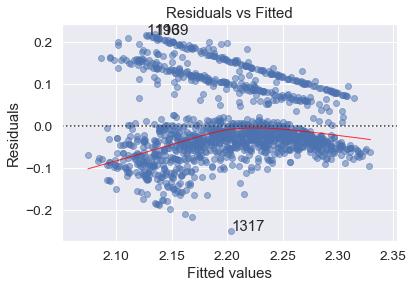

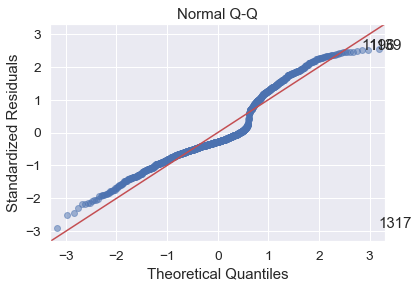

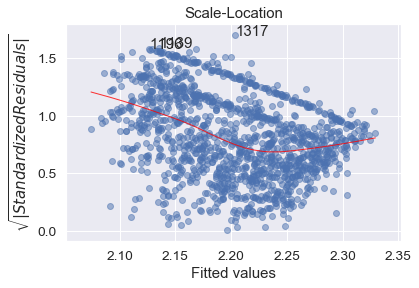

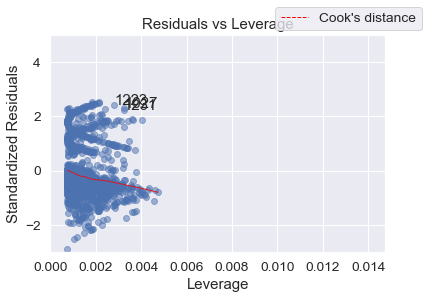

In [87]:
diagnostic_plots(insur_procsd_df['age']+ insur_procsd_df['bmi']+insur_procsd_df['children']+ insur_procsd_df['smoker_no']+ insur_procsd_df['smoker_yes']+ insur_procsd_df['region_northeast']+insur_procsd_df['region_northwest']+ insur_procsd_df['region_southeast']+ insur_procsd_df['region_southwest']+ insur_procsd_df['gender_female']+ insur_procsd_df['gender_male'], insur_procsd_df['MedicalExpenses'],model_fit=None)




